In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported and read successfully")

Data imported and read successfully


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Let's find out that there is any relationship between the data through the 2D Plot:

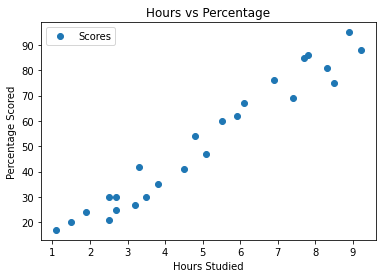

In [4]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### The Graph above shows that there is a positive linear realtion between the given data.

### Preparing the Data

##### Dividing the data into "attributes"(inputs) and "labels"(outputs).

In [5]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

##### Now we will split the data into training and test set through Skicit-Learn's train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Training the Algorithm

##### Now we will train our algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training Done.")

Training Done.


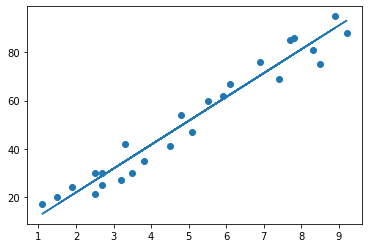

In [8]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

### Making Predictions

In [9]:
y_pred = regressor.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
my_dict = {'Actual':Y_test, 'Predicted':y_pred}
df1 = pd.DataFrame(my_dict)
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
